In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [29]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a28f63481a7e513658e9f1fe6877492


In [31]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | veraval
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | vanimo
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hualmay
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | boguchany
Processing Record 18 of Set 1 | altay
Processing Record 19 of Set 1 | harwich
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | santa cruz
Processing Record 22 of Set 1 | zemio
Proces

Processing Record 37 of Set 4 | katobu
Processing Record 38 of Set 4 | salalah
Processing Record 39 of Set 4 | madimba
Processing Record 40 of Set 4 | huilong
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | ouadda
Processing Record 43 of Set 4 | rantepao
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | itarema
Processing Record 46 of Set 4 | huautla
Processing Record 47 of Set 4 | abu samrah
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | hambantota
Processing Record 50 of Set 4 | chandler
Processing Record 1 of Set 5 | los llanos de aridane
Processing Record 2 of Set 5 | pundaguitan
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | sanchez
Processing Record 5 of Set 5 | kholodnyy
Processing Record 6 of Set 5 | la fria
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | manono
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | antalaha
Processing Record 

Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | eureka
Processing Record 29 of Set 8 | angoram
Processing Record 30 of Set 8 | beri
Processing Record 31 of Set 8 | chikoy
City not found. Skipping...
Processing Record 32 of Set 8 | samagaltay
Processing Record 33 of Set 8 | qaqortoq
Processing Record 34 of Set 8 | cuamba
Processing Record 35 of Set 8 | kahului
Processing Record 36 of Set 8 | byron bay
Processing Record 37 of Set 8 | cabo san lucas
Processing Record 38 of Set 8 | lompoc
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | hervey bay
Processing Record 41 of Set 8 | brae
Processing Record 42 of Set 8 | nigde
Processing Record 43 of Set 8 | rawson
Processing Record 44 of Set 8 | sinnamary
Processing Record 45 of Set 8 | dakar
Processing Record 46 of Set 8 | saint-georges
Processing Record 47 of Set 8 | matehuala
Processing Record 48 of Set 8 | touliu
City not found. Skipping...
Processing Record 49 of Set 8 | bathsheba
Processing Reco

Processing Record 19 of Set 12 | atasu
Processing Record 20 of Set 12 | vestmannaeyjar
Processing Record 21 of Set 12 | ixtapa
Processing Record 22 of Set 12 | morant bay
Processing Record 23 of Set 12 | moissala
Processing Record 24 of Set 12 | hami
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | camalu
Processing Record 27 of Set 12 | doha
Processing Record 28 of Set 12 | mishan
Processing Record 29 of Set 12 | parabel
Processing Record 30 of Set 12 | beyneu
Processing Record 31 of Set 12 | muisne
Processing Record 32 of Set 12 | guiratinga
-----------------------------
Data Retrieval Complete      
-----------------------------


In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
531,Moissala,8.3404,17.7663,89.58,20,82,5.10,TD,2022-03-06 19:45:04
532,Hami,42.8000,93.4500,46.65,16,97,2.53,CN,2022-03-06 19:45:04
533,Palmer,42.1584,-72.3287,64.42,67,40,23.02,US,2022-03-06 19:45:05
534,Camalu,30.8500,-116.0667,60.42,53,1,16.20,MX,2022-03-06 19:45:05
535,Doha,25.2867,51.5333,70.11,73,0,4.61,QA,2022-03-06 19:42:30
536,Mishan,45.5500,131.8833,7.30,93,15,5.79,CN,2022-03-06 19:45:06
537,Parabel,58.6978,81.4825,20.50,96,100,9.37,RU,2022-03-06 19:45:06
538,Beyneu,45.3167,55.2000,29.98,85,78,17.56,KZ,2022-03-06 19:45:06
539,Muisne,0.6000,-80.0333,80.71,74,93,6.98,EC,2022-03-06 19:45:07
540,Guiratinga,-16.3494,-53.7583,80.92,73,27,7.83,BR,2022-03-06 19:45:07


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

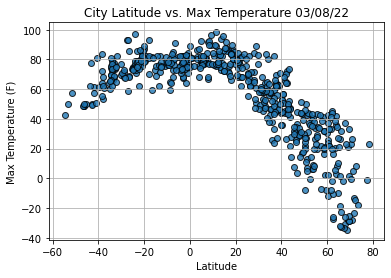

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

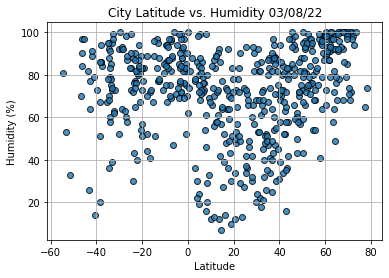

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

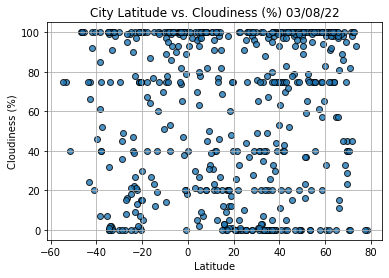

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

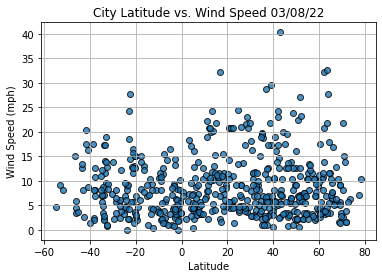

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Lat                      -33.9258
Lng                       18.4232
Max Temp                    72.01
Humidity                       79
Cloudiness                     75
Wind Speed                  17.27
Country                        ZA
Date          2022-03-06 19:30:46
Name: 13, dtype: object

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Veraval,20.9000,70.3667,74.08,53,26,14.18,IN,2022-03-06 19:30:41
4,San Patricio,28.0170,-97.5169,84.61,60,98,21.54,US,2022-03-06 19:30:42
5,Cherskiy,68.7500,161.3000,-34.76,100,33,1.66,RU,2022-03-06 19:30:43
6,Tasiilaq,65.6145,-37.6368,26.76,91,97,9.62,GL,2022-03-06 19:30:43
7,Vila Franca Do Campo,37.7167,-25.4333,64.20,89,98,10.40,PT,2022-03-06 19:30:44


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

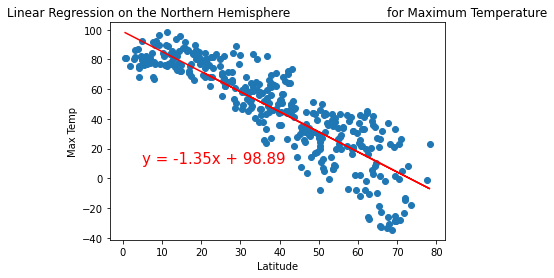

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,10))

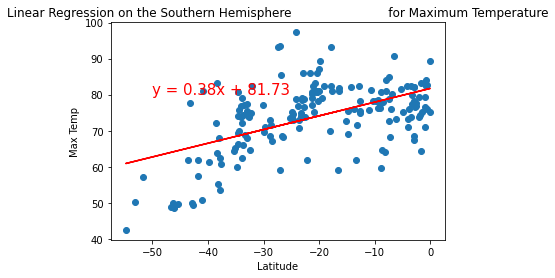

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

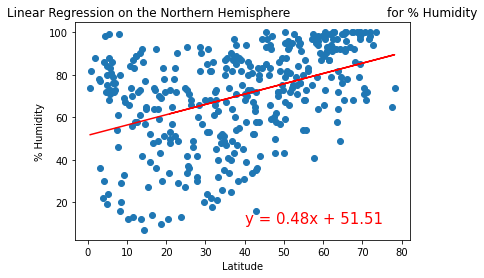

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

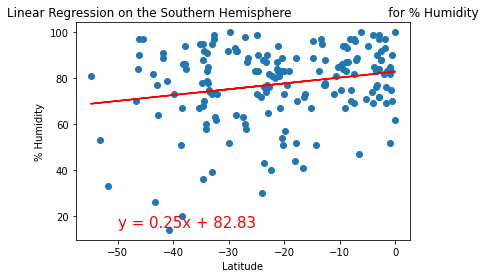

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

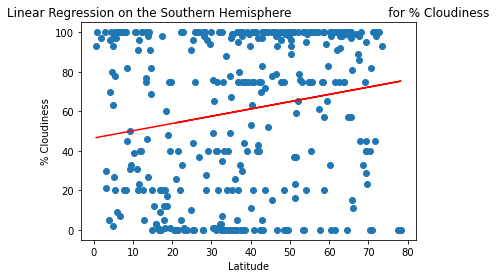

In [68]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

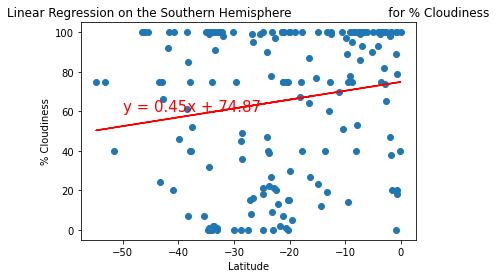

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

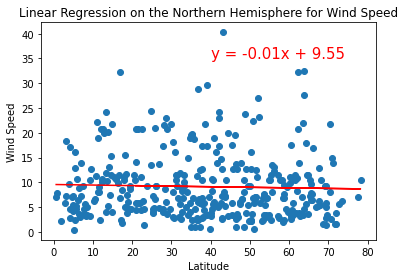

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

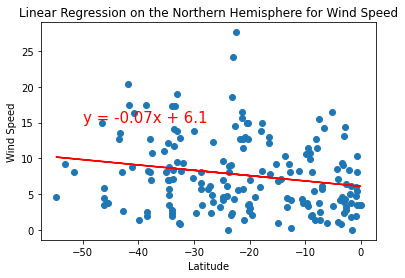

In [75]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(-50,15))